### Stretched grid experimentation 
working off of https://github.com/yt-project/yt/pull/2998/files


This branch inclues changes to some cython, need to re-build. 

The docs example:

In [1]:
import yt
import numpy as np

N = 8

data = {"density": np.random.random((N, N, N))}

cell_widths = []
for i in range(3):
    _ = np.random.random(N)
    _ /= _.sum()
    cell_widths.append(_)

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=np.array([[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]),
    cell_widths=cell_widths,
)

yt : [INFO     ] 2022-08-02 10:33:57,910 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-02 10:33:57,911 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2022-08-02 10:33:57,912 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-02 10:33:57,913 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-02 10:33:57,914 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-08-02 10:34:15,257 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-02 10:34:15,258 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-02 10:34:15,259 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-02 10:34:15,260 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-02 10:34:15,272 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



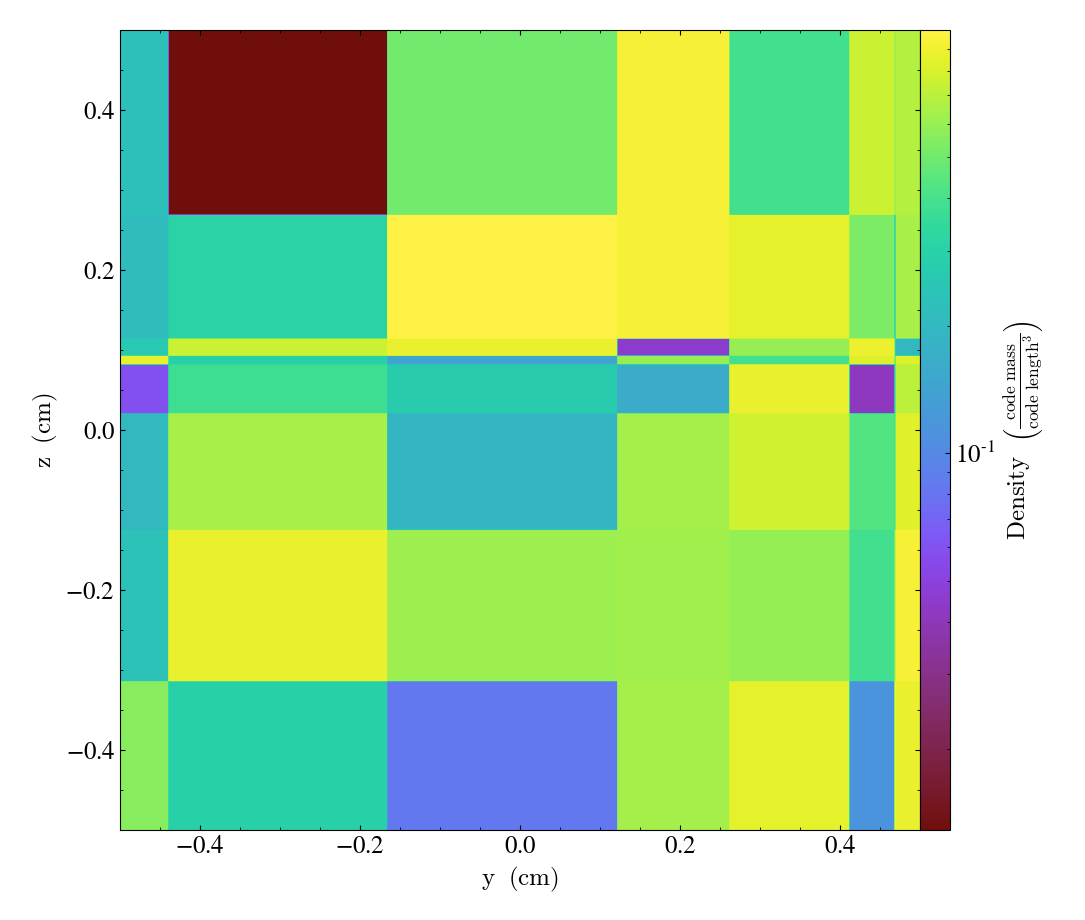

In [2]:
yt.SlicePlot(ds, 'x', ("stream", "density"))

calculate widths from x, y, z arrays

In [9]:
import yt
import numpy as np

N = 8

data = {"density": np.random.random((N, N, N))}
    
cell_widths = []
for i in range(3):
    dim = np.linspace(0., 1., N+1) + np.random.random(N+1) 
    dim = (dim - dim.min())/(dim.max() - dim.min())    
    cell_widths.append(dim[1:] - dim[0:-1])

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=np.array([[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]),
    cell_widths=cell_widths,
)

yt : [INFO     ] 2022-08-02 10:39:51,331 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-02 10:39:51,332 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2022-08-02 10:39:51,334 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-02 10:39:51,335 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-02 10:39:51,336 Parameters: cosmological_simulation   = 0


[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0]


non-normalized

In [12]:
import yt
import numpy as np

N = 8

data = {"density": np.random.random((N, N, N))}
x = np.linspace(0., 5., N+1) + np.random.random(N+1)
y = np.linspace(0., 10., N+1) + np.random.random(N+1) 
z = np.linspace(0., 10., N+1) + np.random.random(N+1) 

bbox = []
cell_widths = []
for dim in [x, y, z]:
    cell_widths.append(dim[1:] - dim[0:-1])
    bbox.append([dim.min(), dim.max()])
bbox = np.array(bbox)

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=bbox,
    cell_widths=cell_widths,
)

yt : [INFO     ] 2022-08-02 10:43:35,270 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-02 10:43:35,271 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2022-08-02 10:43:35,272 Parameters: domain_left_edge          = [0.50241594 0.49398192 0.6682899 ]
yt : [INFO     ] 2022-08-02 10:43:35,273 Parameters: domain_right_edge         = [ 5.81428093 10.11214567 10.3882404 ]
yt : [INFO     ] 2022-08-02 10:43:35,274 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-08-02 10:43:39,486 xlim = 0.493982 10.112146
yt : [INFO     ] 2022-08-02 10:43:39,487 ylim = 0.668290 10.388240
yt : [INFO     ] 2022-08-02 10:43:39,488 xlim = 0.493982 10.112146
yt : [INFO     ] 2022-08-02 10:43:39,488 ylim = 0.668290 10.388240
yt : [INFO     ] 2022-08-02 10:43:39,490 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



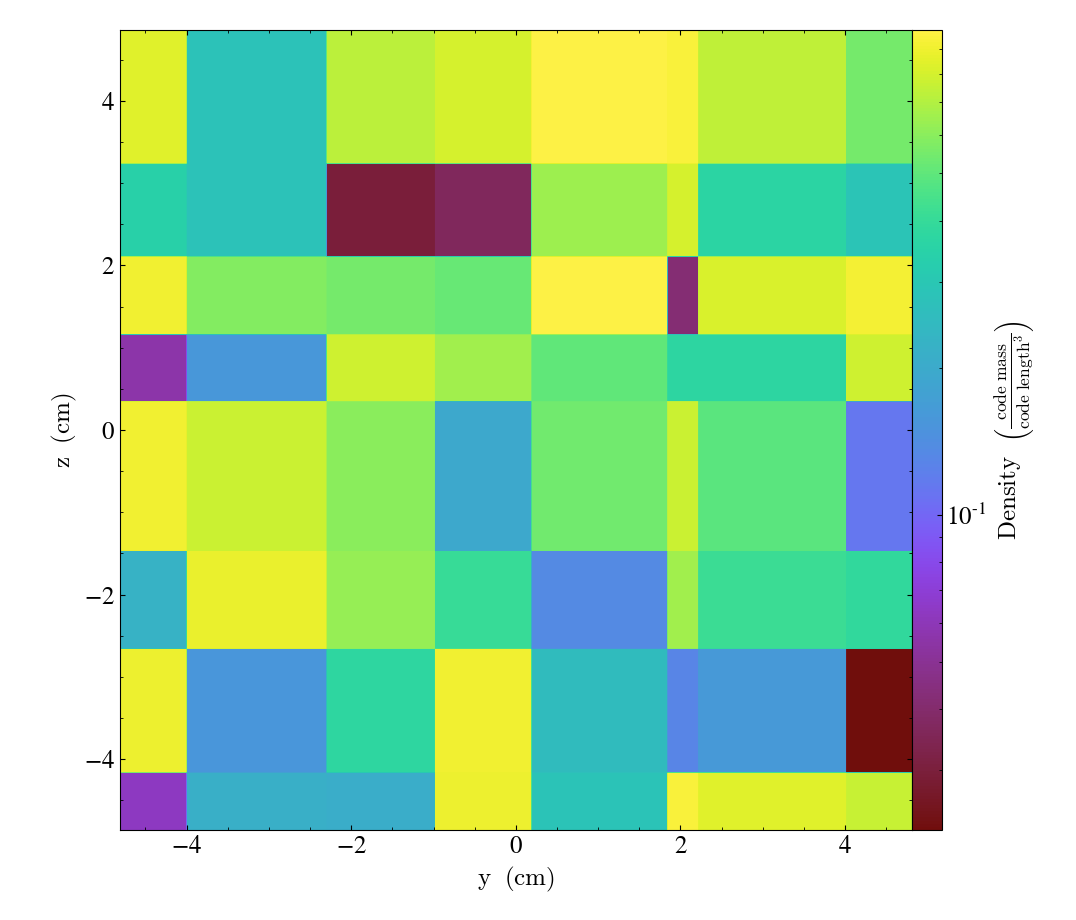

In [13]:
yt.SlicePlot(ds, 'x', ("stream", "density"))

Will it work with non-cartesian?

In [14]:
import yt
import numpy as np

N = 8

data = {"density": np.random.random((N, N, N))}
depth = np.linspace(0., 100., N+1) 
depth[1:] = depth[1:] + np.random.random(N) 
lat = np.linspace(-90., 90., N+1)
lat[1:-1] = lat[1:-1] + np.random.random(N-1) 
lon = np.linspace(-180., 180, N+1)
lon[1:-1] = lon[1:-1] + np.random.random(N-1) 

bbox = []
cell_widths = []
for dim in [depth, lat, lon]:
    cell_widths.append(dim[1:] - dim[0:-1])
    bbox.append([dim.min(), dim.max()])
bbox = np.array(bbox)

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=bbox,
    cell_widths=cell_widths,
    geometry=("internal_geographic", ("depth", "latitude", "longitude"))
)

yt : [INFO     ] 2022-08-02 10:46:46,131 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-02 10:46:46,132 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2022-08-02 10:46:46,133 Parameters: domain_left_edge          = [   0.  -90. -180.]
yt : [INFO     ] 2022-08-02 10:46:46,134 Parameters: domain_right_edge         = [100.51231511  90.         180.        ]
yt : [INFO     ] 2022-08-02 10:46:46,135 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-08-02 10:46:53,637 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 10:46:53,638 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 10:46:53,638 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-02 10:46:53,640 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 10:46:53,641 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 10:46:53,643 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



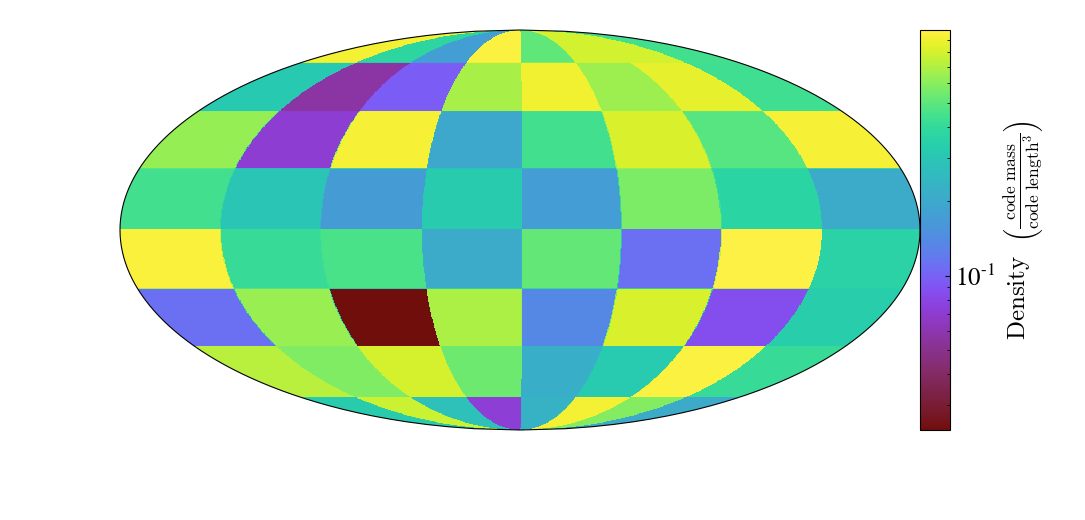

In [15]:
yt.SlicePlot(ds, 'depth', ("stream", "density"))

stretched more noticably :

yt : [INFO     ] 2022-08-02 10:52:30,883 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-02 10:52:30,884 Parameters: domain_dimensions         = [10 10 10]
yt : [INFO     ] 2022-08-02 10:52:30,885 Parameters: domain_left_edge          = [   0.  -90. -180.]
yt : [INFO     ] 2022-08-02 10:52:30,886 Parameters: domain_right_edge         = [100.18103104  90.         180.        ]
yt : [INFO     ] 2022-08-02 10:52:30,887 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-08-02 10:52:30,991 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 10:52:30,992 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 10:52:30,992 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-02 10:52:30,994 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 10:52:30,994 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 10:52:30,996 Making a fixed resolution buffer of (('stream', 'density')) 800 by 800



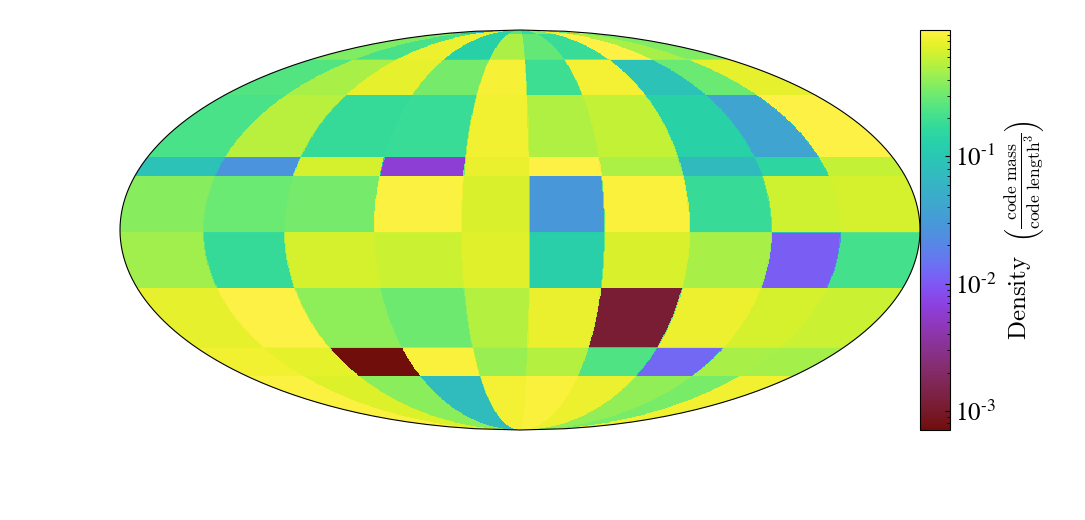

In [23]:
import yt
import numpy as np

N = 10

data = {"density": np.random.random((N, N, N))}
depth = np.linspace(0., 100., N+1) 
depth[1:] = depth[1:] + np.random.random(N) 
lat = np.linspace(-90., 90., N+1)
lat[1:-1] = lat[1:-1] + 20 * np.random.random(N-1) 
lon = np.linspace(-180., 180, N+1)
lon[1:-1] = lon[1:-1] + 10 * np.random.random(N-1) 

bbox = []
cell_widths = []
for dim in [depth, lat, lon]:
    cell_widths.append(dim[1:] - dim[0:-1])
    bbox.append([dim.min(), dim.max()])
bbox = np.array(bbox)

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=bbox,
    cell_widths=cell_widths,
    geometry=("internal_geographic", ("depth", "latitude", "longitude"))
)

yt.SlicePlot(ds, 'depth', ("stream", "density"))

ok, how bout some real data?

Text(0, 0.5, 'cell center [km]')

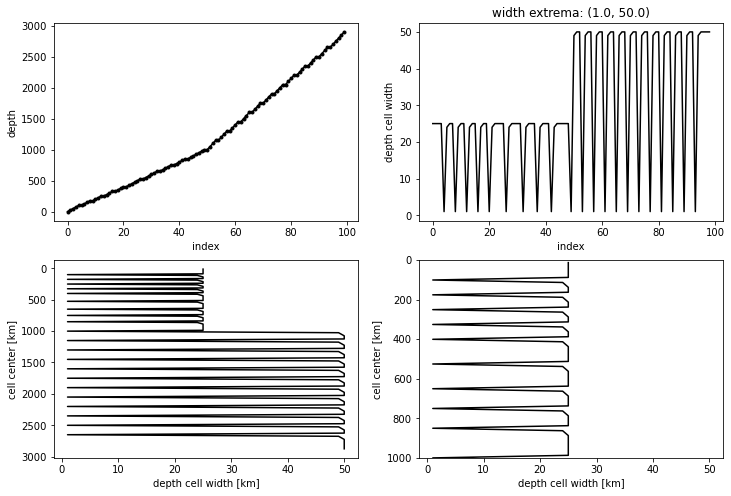

In [51]:
import xarray as xr
import os 
import matplotlib.pyplot as plt 

ddir = os.path.join(yt.config.ytcfg.get('yt','test_data_dir'), 'sample_nc')
datasets = {
    "internal_geographic_partial": os.path.join(ddir,'wUS-SH-2010_percent.nc'), 
    "internal_geographic_global": os.path.join(ddir,'GYPSUM_percent.nc'), 
}

ds = xr.open_dataset(os.path.join(ddir, datasets["internal_geographic_global"]))

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(dvs.coords['depth'],'k')
plt.plot(dvs.coords['depth'],'.k')
plt.ylabel("depth")
plt.xlabel("index")

plt.subplot(2,2,2)
dp = dvs.coords['depth'].to_numpy()
wids = dp[1:] - dp[0:-1]
plt.plot(wids,'k')
plt.ylabel("depth cell width")
plt.title(f"width extrema: ({wids.min()}, {wids.max()})")
plt.xlabel("index")

plt.subplot(2,2,3)
centers = (dp[1:] + dp[0:-1])/2
plt.plot(wids, centers, 'k')
plt.gca().invert_yaxis()
plt.xlabel("depth cell width [km]")
plt.ylabel("cell center [km]")

plt.subplot(2,2,4)
plt.plot(wids, centers, 'k')
plt.ylim([0, 1000])
plt.gca().invert_yaxis()
plt.xlabel("depth cell width [km]")
plt.ylabel("cell center [km]")


So because the raw data are measurement points, we'll create an edge array first:

((101,), (100,))


(-30.0, 500.0)

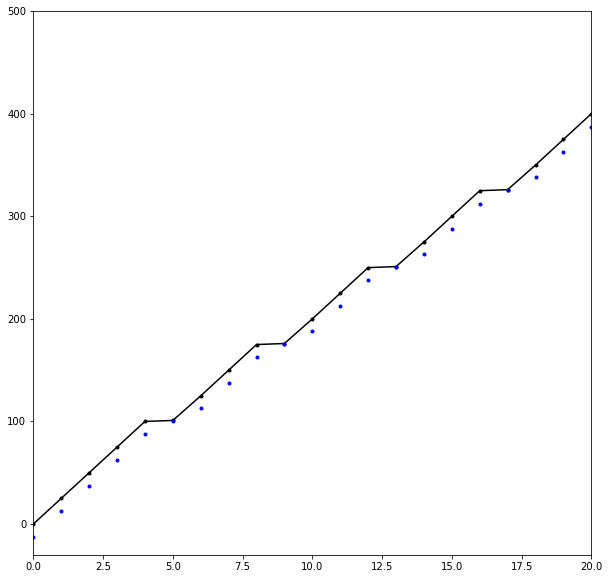

In [73]:
dp = dvs.coords['depth'].to_numpy()
wids = dp[1:] - dp[0:-1]
centers = (dp[1:] + dp[0:-1])/2
centers = np.concatenate([np.array([0-wids[0]/2]), centers, np.array([centers[-1]+wids[-1]/2.])])
print((centers.shape, dp.shape))
plt.figure(figsize=(10,10))
plt.plot(dp,'k')
plt.plot(dp,'.k')
plt.plot(centers,'.b')
plt.xlim(0,20)
plt.ylim(-30, 500)


In [70]:
wids

array([25., 25., 25., 25.,  1., 24., 25., 25.,  1., 24., 25., 25.,  1.,
       24., 25., 25.,  1., 24., 25., 25.,  1., 24., 25., 25., 25., 25.,
        1., 24., 25., 25., 25., 25.,  1., 24., 25., 25., 25.,  1., 24.,
       25., 25., 25.,  1., 24., 25., 25., 25., 25., 25.,  1., 49., 50.,
       50.,  1., 49., 50., 50.,  1., 49., 50., 50.,  1., 49., 50., 50.,
        1., 49., 50., 50.,  1., 49., 50., 50.,  1., 49., 50., 50.,  1.,
       49., 50., 50.,  1., 49., 50., 50.,  1., 49., 50., 50.,  1., 49.,
       50., 50.,  1., 49., 50., 50., 50., 50.], dtype=float32)

In [74]:
edges = (dp[1:] + dp[0:-1])/2
edges = np.concatenate([np.array([dp.min()]), edges, np.array([dp.max()])])
edges

array([   0. ,   12.5,   37.5,   62.5,   87.5,  100.5,  113. ,  137.5,
        162.5,  175.5,  188. ,  212.5,  237.5,  250.5,  263. ,  287.5,
        312.5,  325.5,  338. ,  362.5,  387.5,  400.5,  413. ,  437.5,
        462.5,  487.5,  512.5,  525.5,  538. ,  562.5,  587.5,  612.5,
        637.5,  650.5,  663. ,  687.5,  712.5,  737.5,  750.5,  763. ,
        787.5,  812.5,  837.5,  850.5,  863. ,  887.5,  912.5,  937.5,
        962.5,  987.5, 1000.5, 1025.5, 1075. , 1125. , 1150.5, 1175.5,
       1225. , 1275. , 1300.5, 1325.5, 1375. , 1425. , 1450.5, 1475.5,
       1525. , 1575. , 1600.5, 1625.5, 1675. , 1725. , 1750.5, 1775.5,
       1825. , 1875. , 1900.5, 1925.5, 1975. , 2025. , 2050.5, 2075.5,
       2125. , 2175. , 2200.5, 2225.5, 2275. , 2325. , 2350.5, 2375.5,
       2425. , 2475. , 2500.5, 2525.5, 2575. , 2625. , 2650.5, 2675.5,
       2725. , 2775. , 2825. , 2875. , 2900. ], dtype=float32)

In [75]:
edges.size

101

In [132]:
import xarray as xr
import yt
import os
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ddir = os.path.join(yt.config.ytcfg.get('yt','test_data_dir'), 'sample_nc')
      

# https://ds.iris.edu/files/products/emc/emc-files/GYPSUM_percent.nc : a global model
# https://ds.iris.edu/files/products/emc/emc-files/wUS-SH-2010_percent.nc : a non-global model covering the western US


datasets = {
    "internal_geographic_partial": os.path.join(ddir,'wUS-SH-2010_percent.nc'), 
    "internal_geographic_global": os.path.join(ddir,'GYPSUM_percent.nc'), 
}


def get_widths(x):
    # calculates the cell width from an array of observation points, preserving
    # the min/max of the ranges. 
    extrema = [x.min(), x.max()]
    
    # calculate edges of cells, preserving data min/max.
    edges = (x[1:] +x[0:-1])/2
    edges = np.concatenate([np.array([extrema[0]]), edges, np.array([extrema[1]])])                        
    wids = edges[1:] - edges[0:-1]
    return wids.astype(np.float64), extrema
    
def get_internal_IRIS(case):
    # both datasets have the same variables and dimension order
    
    fi = datasets[case]
     
    with xr.open_dataset(fi) as xr_ds:
        dvs = xr_ds.dvs.to_masked_array().data
        
        fake_data = np.ones(dvs.shape)
        for idep in range(1,dvs.shape[0]):
            fake_data[idep, :, :] = -1 * fake_data[idep-1, :, :]
            
            
        depth_wids, deprng = get_widths(xr_ds.depth.data)
        lon_wids, lonrng = get_widths(xr_ds.longitude.data)
        lat_wids, latrng = get_widths(xr_ds.latitude.data)
        

    data = {'dvs': (dvs, "%"),
            'flipping_ones': (fake_data, "")}
    
    bbox = np.array([
      deprng,   
      latrng,
      lonrng
    ])
    
    cell_wids = [depth_wids, lat_wids, lon_wids]

    dims = ['depth', 'latitude', 'longitude']

    return yt.load_uniform_grid(data, data['dvs'][0].shape, 1.0, 
                                geometry=("internal_geographic", dims),
                                bbox=bbox, 
                                cell_widths=cell_wids)



In [133]:
ds = get_internal_IRIS('internal_geographic_global')


yt : [INFO     ] 2022-08-02 12:35:23,474 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-02 12:35:23,475 Parameters: domain_dimensions         = [100 181 361]
yt : [INFO     ] 2022-08-02 12:35:23,476 Parameters: domain_left_edge          = [   0.  -90. -180.]
yt : [INFO     ] 2022-08-02 12:35:23,477 Parameters: domain_right_edge         = [2900.   90.  180.]
yt : [INFO     ] 2022-08-02 12:35:23,478 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-08-02 12:35:25,118 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 12:35:25,119 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 12:35:25,119 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-02 12:35:25,121 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 12:35:25,122 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 12:35:25,124 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2022-08-02 12:35:25,184 Plotting ('stream', 'dvs'): Both positive and negative values. Min = -4.408239841461238 %, Max = 5.310200214386054 %.
yt : [WARNING  ] 2022-08-02 12:35:25,185 Switching to symlog colorbar scaling.



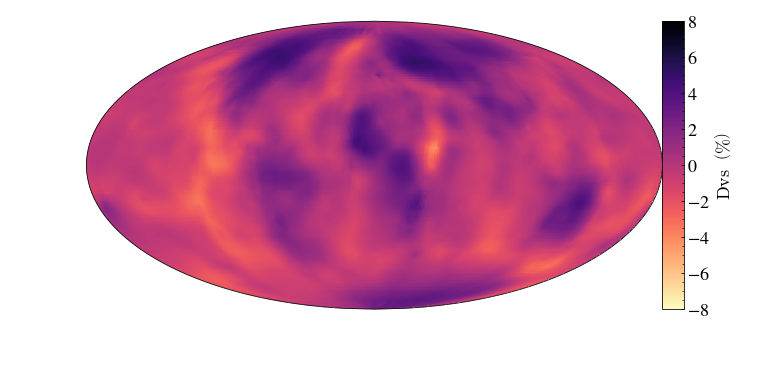

In [134]:
c = ds.domain_center
c[0] = 200.
slc = yt.SlicePlot(ds, 'depth', ('stream', 'dvs'), center=c)
slc.set_log(('stream', 'dvs'), False)
slc.set_cmap(('stream', 'dvs'), "magma_r")
slc.set_zlim(('stream', 'dvs'), -8, 8)


yt : [INFO     ] 2022-08-02 12:35:27,645 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 12:35:27,645 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 12:35:27,646 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-02 12:35:27,648 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-02 12:35:27,648 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-02 12:35:27,651 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2022-08-02 12:35:27,689 Plotting ('stream', 'dvs'): Both positive and negative values. Min = -7.125199794769604 %, Max = 6.229640007019122 %.
yt : [WARNING  ] 2022-08-02 12:35:27,690 Switching to symlog colorbar scaling.



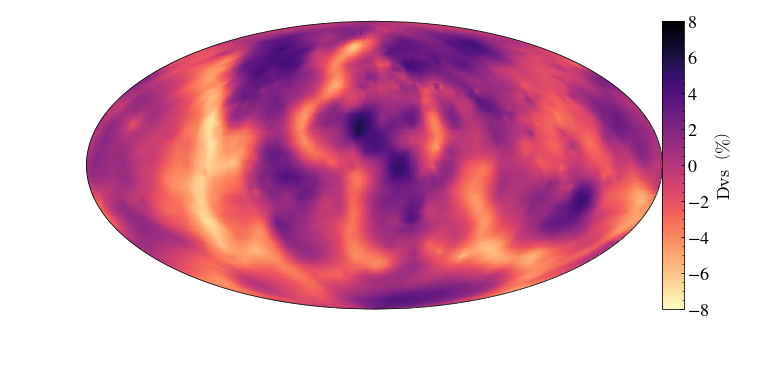

In [135]:
c = ds.domain_center
c[0] = 100.
slc = yt.SlicePlot(ds, 'depth', ('stream', 'dvs'), center=c)
slc.set_log(('stream', 'dvs'), False)
slc.set_cmap(('stream', 'dvs'), "magma_r")
slc.set_zlim(('stream', 'dvs'), -8, 8)


yt : [INFO     ] 2022-08-02 12:35:30,139 xlim = 0.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:30,140 ylim = -2900.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:30,141 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-02 12:35:30,144 xlim = 0.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:30,145 ylim = -2900.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:30,147 Making a fixed resolution buffer of (('stream', 'dvs')) 1000 by 1000
yt : [WARNING  ] 2022-08-02 12:35:31,555 Plotting ('stream', 'dvs'): Both positive and negative values. Min = -4.014560222625732 %, Max = 4.356019973754883 %.
yt : [WARNING  ] 2022-08-02 12:35:31,555 Switching to symlog colorbar scaling.



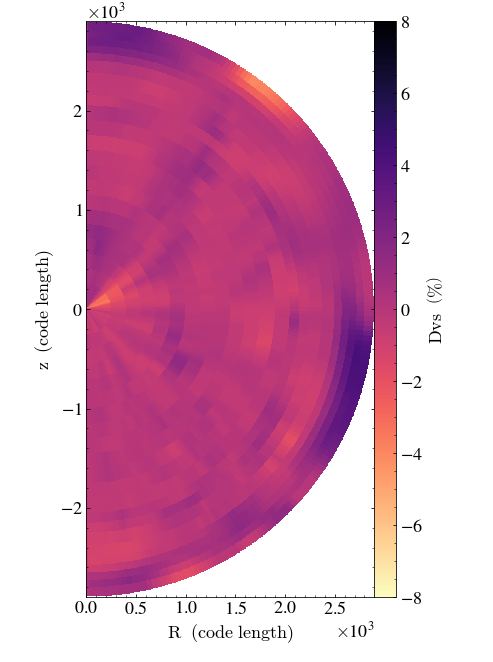

In [136]:
slc = yt.SlicePlot(ds, 'longitude', ('stream', 'dvs'), buff_size=(1000,1000))
slc.set_log(('stream', 'dvs'), False)
slc.set_cmap(('stream', 'dvs'), "magma_r")
slc.set_zlim(('stream', 'dvs'), -8, 8)

yt : [INFO     ] 2022-08-02 12:35:32,671 xlim = 0.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:32,671 ylim = -2900.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:32,672 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-02 12:35:32,674 xlim = 0.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:32,675 ylim = -2900.000000 2900.000000
yt : [INFO     ] 2022-08-02 12:35:32,676 Making a fixed resolution buffer of (('stream', 'flipping_ones')) 1000 by 1000
yt : [WARNING  ] 2022-08-02 12:35:34,075 Plotting ('stream', 'flipping_ones'): Both positive and negative values. Min = -1.0 dimensionless, Max = 1.0 dimensionless.
yt : [WARNING  ] 2022-08-02 12:35:34,075 Switching to symlog colorbar scaling.



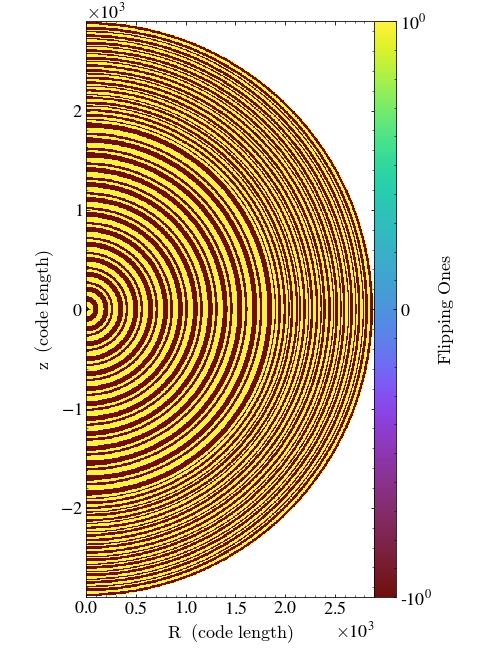

In [137]:
slc = yt.SlicePlot(ds, 'longitude', ('stream', 'flipping_ones'), buff_size=(1000,1000))
slc.show()